In [44]:
import pandas as pd

df = pd.read_csv('olimpic_medals.csv')

###### 1) Сколько медалей выиграл Jesse Owens в 1936?

In [18]:
df_shape = df[(df.Athlete == 'OWENS, Jesse') & (df.Edition == 1936)].shape[0]
print(f'В 1936 Jesse Owens выиграл {df_shape} медали')

В 1936 Jesse Owens выиграл 4 медали


###### 2) Какая страна выиграла большинство золотых медалей мужчинами в бадминтоне?

In [3]:
dataframe = df[(df.Event_gender == 'M') & (df.Sport == 'Badminton') & (df.Medal == 'Gold')].value_counts('NOC')
print(f'{dataframe.index[0]} выиграла большинство золотых медалей среди мужчин в бадминтоне')

INA выиграла большинство золотых медалей среди мужчин в бадминтоне


###### 3) Какие три страны выиграли большинство медалей в последние годы (с 1984 по 2008)?

In [7]:
dataframe = df[(df.Edition >= 1984)].value_counts('NOC')
print(f'{dataframe.index[0]}, {dataframe.index[1]} и {dataframe.index[2]} выиграли \
большинство медалей в последние годы (с 1984 по 2008)')

USA, AUS и GER выиграли большинство медалей в последние годы (с 1984 по 2008)


###### 4) Покажите мужчин золотых медалистов по 100m. Выведите результаты по убыванию года выигрыша. Покажите город в котором проходила олимпиала, год, имя атлета и страну за которую он выступал

In [8]:
dataframe = df[
    (df.Event == '100m') & (df.Medal == 'Gold') & (df.Event_gender == 'M')
].sort_values(by='Edition', ascending=False)
dataframe[['City', 'Edition', 'Athlete', 'NOC']].style.hide(axis='index')

City,Edition,Athlete,NOC
Beijing,2008,"BOLT, Usain",JAM
Athens,2004,"GATLIN, Justin",USA
Sydney,2000,"GREENE, Maurice",USA
Atlanta,1996,"BAILEY, Donovan",CAN
Barcelona,1992,"CHRISTIE, Linford",GBR
Seoul,1988,"LEWIS, Carl",USA
Los Angeles,1984,"LEWIS, Carl",USA
Moscow,1980,"WELLS, Allan",GBR
Montreal,1976,"CRAWFORD, Hasely",TRI
Munich,1972,"BORZOV, Valery",URS


###### 5) Как много медалей было выиграно мужчинами и женщинами в истории олимпиады. Как много золотых, серебрянных и бронзовых медалей было выиграно каждым полом?

In [25]:
for value, group in df.groupby('Gender'):
    print(f'Пол: {value}')
    print(f"Количество выигранных медалей:\
    Всего: {group.shape[0]},\
    Золотых: {group[group.Medal == 'Gold'].shape[0]},\
    Серебряных: {group[group.Medal == 'Silver'].shape[0]},\
    Бронзовых: {group[group.Medal == 'Bronze'].shape[0]}\n")

Пол: Men
Количество выигранных медалей:    Всего: 21721,    Золотых: 7365,    Серебряных: 7181,    Бронзовых: 7175

Пол: Women
Количество выигранных медалей:    Всего: 7495,    Золотых: 2485,    Серебряных: 2496,    Бронзовых: 2514



###### 6) Используя groupby(), постройте график числа всех медалей выигранных на каждой олимпиаде.

<AxesSubplot:xlabel='Edition'>

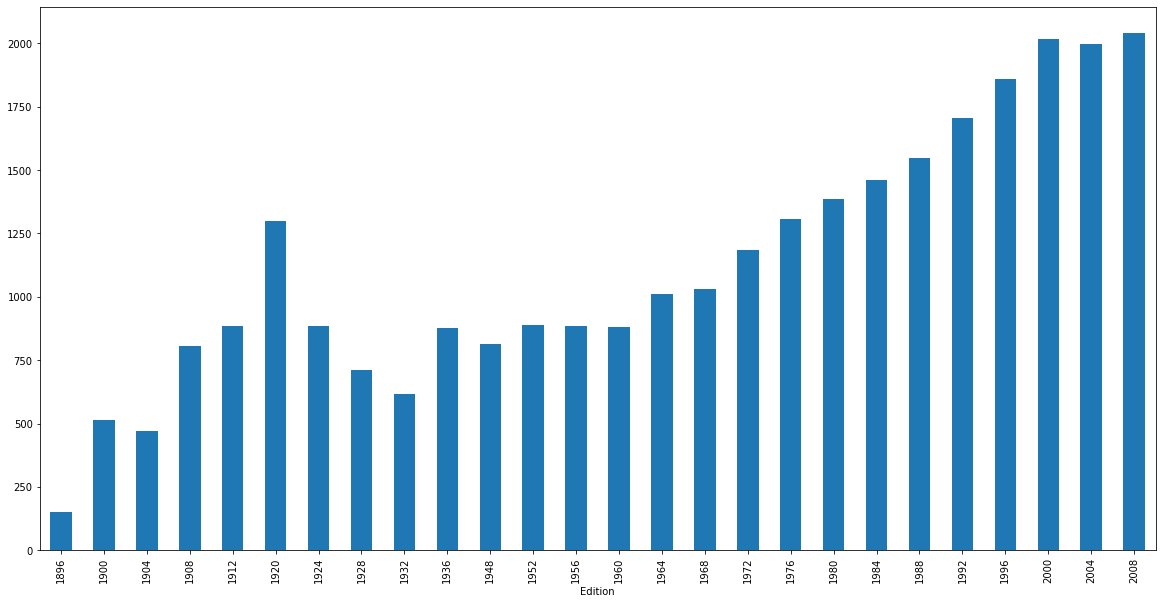

In [24]:
dataframe = df.groupby('Edition').size()
dataframe.plot(figsize=(20, 10), kind='bar')

###### 7) Создайте список показывающий число всех медалей выигранных каждой страной в течение всей истории олимпийских игр. Для каждой страны, необходимо показать год первой и последней заработанной медали.

In [51]:
for value, group in df.groupby('NOC'):
    print(f'Страна {value}')
    print(f'{group.shape[0]} медаль(-и-ей)')
    print(f'первая в {group.Edition.min()}')
    print(f'последняя в {group.Edition.max()}\n')

Страна AFG
1 медаль(-и-ей)
первая в 2008
последняя в 2008

Страна AHO
1 медаль(-и-ей)
первая в 1988
последняя в 1988

Страна ALG
14 медаль(-и-ей)
первая в 1984
последняя в 2008

Страна ANZ
29 медаль(-и-ей)
первая в 1908
последняя в 1912

Страна ARG
239 медаль(-и-ей)
первая в 1924
последняя в 2008

Страна ARM
9 медаль(-и-ей)
первая в 1996
последняя в 2008

Страна AUS
1075 медаль(-и-ей)
первая в 1896
последняя в 2008

Страна AUT
146 медаль(-и-ей)
первая в 1896
последняя в 2008

Страна AZE
16 медаль(-и-ей)
первая в 1996
последняя в 2008

Страна BAH
23 медаль(-и-ей)
первая в 1956
последняя в 2008

Страна BAR
1 медаль(-и-ей)
первая в 2000
последняя в 2000

Страна BDI
1 медаль(-и-ей)
первая в 1996
последняя в 1996

Страна BEL
408 медаль(-и-ей)
первая в 1900
последняя в 2008

Страна BER
1 медаль(-и-ей)
первая в 1976
последняя в 1976

Страна BLR
92 медаль(-и-ей)
первая в 1996
последняя в 2008

Страна BOH
7 медаль(-и-ей)
первая в 1900
последняя в 1908

Страна BRA
372 медаль(-и-ей)
первая в 1920

###### 8) Атлеты выигравшие медали в Beijing на дистанции 100m или 200m.

In [12]:
dataframe = df[(df.City == 'Beijing') & ((df.Event == '100m') | (df.Event == '200m'))]
dataframe[['Athlete']].style.hide(axis='index')

Athlete
"DIX, Walter"
"BOLT, Usain"
"THOMPSON, Richard"
"FRASER, Shelly-ann"
"SIMPSON, Sherone"
"STEWART, Kerron"
"DIX, Walter"
"BOLT, Usain"
"CRAWFORD, Shawn"
"STEWART, Kerron"


###### 9) Постройте график числа золотых медалей выигранных США мужчинами и женщинами в атлетике.

<AxesSubplot:xlabel='Gender'>

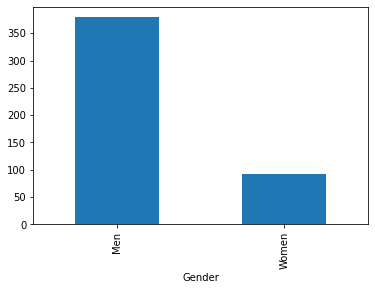

In [5]:
dataframe = df[(df.Medal == 'Gold') & (df.NOC == 'USA') & (df.Sport == 'Athletics')]
dataframe.groupby('Gender').size().plot.bar()

###### 10) Постройте график 5 атлетов которые выиграли большинство золотых медалей.

<AxesSubplot:xlabel='Athlete'>

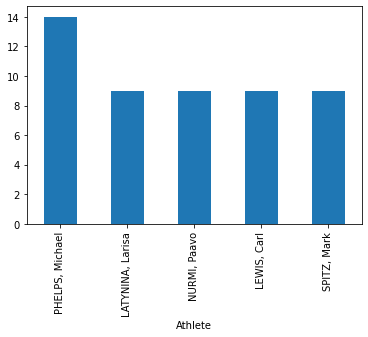

In [52]:
dataframe = df[df.Medal == 'Gold'].groupby('Athlete').size().sort_values(ascending=False).head(5)
dataframe.plot.bar()

###### 11) Покажите суммарное количество медалей выигранных странами в последних олимпийских играх.

In [58]:
dataframe = df[df.Edition == df.iloc[-1]['Edition']].groupby('NOC').size()
dataframe

NOC
AFG      1
ALG      2
ARG     51
ARM      6
AUS    149
      ... 
USA    315
UZB      6
VEN      1
VIE      1
ZIM      4
Length: 86, dtype: int64

###### 12) Постройте таблицу в которой по годам всех олимпиад покажите топовых атлетов США(1 атлет на год) по общему количеству медалей. Включите дисциплину атлета.

In [17]:
dataframe = df[df.NOC == 'USA']
for value, group in dataframe.groupby(['Edition']):
    print(group.groupby(['Edition', 'Athlete', 'Discipline']).size().sort_values(ascending=False).head(1))

Edition  Athlete          Discipline
1896     GARRETT, Robert  Athletics     4
dtype: int64
Edition  Athlete         Discipline
1900     BAXTER, Irving  Athletics     5
dtype: int64
Edition  Athlete        Discipline 
1904     EYSER, George  Artistic G.    6
dtype: int64
Edition  Athlete           Discipline
1908     SHERIDAN, Martin  Athletics     3
dtype: int64
Edition  Athlete                Discipline
1912     OSBURN, Carl Townsend  Shooting      4
dtype: int64
Edition  Athlete                 Discipline
1920     SPOONER, Lloyd Spencer  Shooting      7
dtype: int64
Edition  Athlete            Discipline
1924     RICHARDS, Vincent  Tennis        3
dtype: int64
Edition  Athlete                 Discipline
1928     OSIPOWICH, Albina Lucy  Swimming      2
dtype: int64
Edition  Athlete             Discipline
1932     DIDRIKSON, Mildred  Athletics     3
dtype: int64
Edition  Athlete       Discipline
1936     OWENS, Jesse  Athletics     4
dtype: int64
Edition  Athlete                  Disc